In [16]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
# Read the City and Ride Data
city = pd.read_csv("./data/city_data.csv")
ride = pd.read_csv("./data/ride_data.csv")
# Combine the data into a single dataset
city_df = pd.read_csv("./data/city_data.csv")
ride_df = pd.read_csv("./data/ride_data.csv")
# Display the data table for preview
ride_df.head
ride_df
#merge_table = pd.merge(info_pd, items_pd, on="customer_id", how="outer")
pyber_df = pd.merge(city_df, ride_df, on ="city", sort = "true", how = "left")
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Amandaburgh,12,Urban,2018-03-05 02:15:38,26.28,906850928986
1,Amandaburgh,12,Urban,2018-02-24 23:10:49,43.66,6573820412437
2,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
3,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
4,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492


## Bubble Plot of Ride Sharing Data

['Urban' 'Suburban' 'Rural']


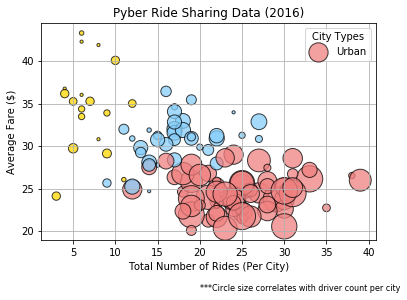

In [61]:
# create data
#rural_df = city_df.loc[city_df["type"] == "Rural",:]
#suburban_df = city_df.loc[city_df["type"] == "Suburban",:]
#urban_df = city_df.loc[city_df["type"] == "Urban",:]

# use the scatter function
#plt.scatter(x, y, s=z*1000, alpha=0.5)
#plt.show()

# Obtain the x and y coordinates for each of the three city types
grouped_cities = pyber_df.groupby(["city"])
x_vals = pyber_df["city"].value_counts().sort_index()
y_vals = grouped_cities["fare"].mean()

# Build the scatter plots for each city types

colors = {
    "Urban": "lightcoral",
    "Suburban": "lightskyblue",
    "Rural": "gold"
}

# Incorporate the other graph properties
sizes = grouped_cities["driver_count"].first()*10

# Create a legend

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
# Incorporate a text label regarding circle size
plt.text(20,13,"***Circle size correlates with driver count per city", fontsize = 8)
# Save Figure
plt.scatter(x_vals, y_vals, s=sizes, c=[ colors[city_type] for city_type in grouped_cities["type"].first() ], linewidth=1, edgecolor="black", alpha=0.75)
city_list = pyber_df["type"].unique()

plt.legend(city_list, title="City Types")
plt.grid()

plt.savefig("./data/Pyber1.png")
print(city_list)

## Total Fares by City Type

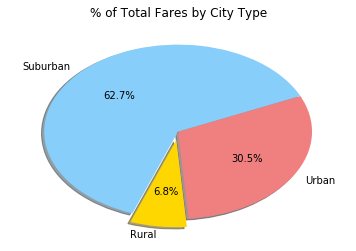

<Figure size 432x288 with 0 Axes>

In [71]:
# Calculate Type Percents
grouped_types = pyber_df.groupby(["type"])
total = grouped_types["fare"].sum()

# Labels for the sections of our pie chart
labels = ["Rural", "Urban", "Suburban"]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]
plt.title("% of Total Fares by City Type")
# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Save Figure
plt.pie(total, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)
plt.show()
plt.savefig("./data/Pyber2.png")

## Total Rides by City Type

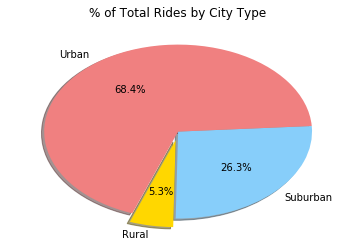

<Figure size 432x288 with 0 Axes>

In [78]:
# Calculate Ride Percents
ride_total = grouped_types["ride_id"].count()
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0.1,0,0)
plt.title("% of Total Rides by City Type")
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(ride_total, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=250)

# Show Figure
plt.show()

# Save Figure
plt.savefig("./data/Pyber3.png")

## Total Drivers by City Type

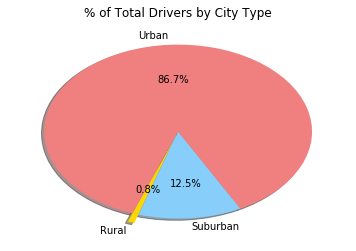

<Figure size 432x288 with 0 Axes>

In [85]:
# Calculate Driver Percents
driver_total = grouped_types["driver_count"].sum()
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0.1,0,0)
plt.title("% of Total Drivers by City Type")
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(driver_total, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=250)

# Show Figure
plt.show()

# Save Figure
plt.savefig("./data/Pyber4.png")